In [69]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd
from IPython.display import display
from typing import NamedTuple
import json

In [101]:
pkgs = pd.DataFrame(json.load(open('packages.json')))
pkgs['releaseDate'] = pd.to_datetime(pkgs['releaseDate'])
pkgs['extensionPragmas'] = pkgs['extensionPragmas'].apply(set)
pkgs['defaultExtensions'] = pkgs['defaultExtensions'].apply(set)

pkgs

,defaultExtensions,extensionPragmas,name,releaseDate,version
0,{},"{DefaultSignatures, BangPatterns, TypeFamilies...",text-lips,2022-09-17 15:35:56+00:00,0.1.0.2
1,{},"{TypeFamilies, UndecidableInstances, DeriveFun...",reflex-dom-colonnade,2016-10-17 17:18:35+00:00,0.4.6
2,{},"{MultiParamTypeClasses, CPP, PackageImports}",cryptohash-cryptoapi,2016-03-26 13:34:43+00:00,0.1.4
3,{},{},change-monger,2013-09-25 21:47:05+00:00,0.0
4,{},"{RankNTypes, MultiParamTypeClasses, DeriveFunc...",hafar,2020-04-14 12:45:35+00:00,0.1.1.0
...,...,...,...,...,...
16957,{},"{FlexibleContexts, DataKinds, LambdaCase, Mult...",affinely-extended,2017-04-05 06:41:11+00:00,0.1.0.0
16958,{},{},zipper-extra,2020-08-28 15:01:29+00:00,0.1.3.2
16959,{},"{MultiParamTypeClasses, DeriveFunctor, Functio...",haskell-rules,2015-01-16 10:24:50+00:00,0.1.0.1
16960,{},"{ViewPatterns, FlexibleInstances, OverloadedSt...",cipher-des,2013-10-24 06:44:38+00:00,0.0.6


# Extensions

Text(0, 0.5, 'number of occurrences')

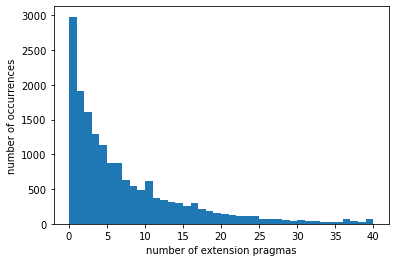

In [90]:
pl.hist(pkgs['extensionPragmas'].apply(len) + pkgs['defaultExtensions'].apply(len),
        range=(0, 40), bins=40)
pl.xlabel('number of extension pragmas')
pl.ylabel('number of occurrences')

In [92]:
allExtensions = \
    { e for pkg in pkgs.itertuples() for e in pkg.defaultExtensions } | \
    { e for pkg in pkgs.itertuples() for e in pkg.extensionPragmas }

In [95]:
usages = \
    [ (e, len([pkg for pkg in pkgs.itertuples() if e in pkg.defaultExtensions]),
          len([pkg for pkg in pkgs.itertuples() if e in pkg.extensionPragmas]))
     for e in allExtensions ]
usages = pd.DataFrame(usages, columns=['extension','default-extensions','pragmas'])
usages['total uses'] = usages['pragmas'] + usages['default-extensions']

In [96]:
usages.sort_values('total uses', ascending=False).style

,extension,default-extensions,pragmas,total uses
117,OverloadedStrings,1300,5824,7124
109,FlexibleInstances,1158,5099,6257
88,ScopedTypeVariables,1163,4660,5823
31,FlexibleContexts,1206,4346,5552
70,TypeFamilies,906,3595,4501
122,MultiParamTypeClasses,975,3508,4483
28,CPP,276,4186,4462
13,GeneralizedNewtypeDeriving,819,2770,3589
0,RankNTypes,745,2745,3490
102,DeriveGeneric,866,2615,3481


# GHC2021 impact

Let's see what fraction of packages use only the GHC2021 extensions.

In [97]:
ghc2021 = set('''
    BangPatterns
    BinaryLiterals
    ConstrainedClassMethods
    ConstraintKinds
    DeriveDataTypeable
    DeriveFoldable
    DeriveFunctor
    DeriveGeneric
    DeriveLift
    DeriveTraversable
    DoAndIfThenElse
    EmptyCase
    EmptyDataDecls
    EmptyDataDeriving
    ExistentialQuantification
    ExplicitForAll
    FieldSelectors
    FlexibleContexts
    FlexibleInstances
    ForeignFunctionInterface
    GADTSyntax
    GeneralisedNewtypeDeriving
    HexFloatLiterals
    ImplicitPrelude
    ImportQualifiedPost
    InstanceSigs
    KindSignatures
    MonomorphismRestriction
    MultiParamTypeClasses
    NamedFieldPuns
    NamedWildCards
    NumericUnderscores
    PatternGuards
    PolyKinds
    PostfixOperators
    RankNTypes
    RelaxedPolyRec
    ScopedTypeVariables
    StandaloneDeriving
    StandaloneKindSignatures
    StarIsType
    TraditionalRecordSyntax
    TupleSections
    TypeApplications
    TypeOperators
    TypeSynonymInstances
'''.split())

In [129]:
len([
    pkg
    for pkg in pkgs.itertuples()
    if (pkg.defaultExtensions | pkg.extensionPragmas) < ghc2021
])

4207

In [128]:
len(pkgs)

16962

# Stability field

In [125]:
!rg -iLuuu 'stability *: *(\w+)' --glob='*.hs' -o trees -r'$1' > stability
stability = pd.read_csv('stability', delimiter=':', names=['file','stability'])
pd.DataFrame(pd.value_counts(stability['stability'])).style

trees/hackport/hackport-0.5.1/hackport: No such file or directory (os error 2)
trees/hackport/hackport-0.5.2/hackport: No such file or directory (os error 2)
trees/hackport/hackport-0.5.3/hackport: No such file or directory (os error 2)
trees/caledon/caledon-3.2.1.0/examples/.#implicit.ncc: No such file or directory (os error 2)
trees/caledon/caledon-2.0.0.0/examples/.#universe.ncc: No such file or directory (os error 2)
trees/subnet/subnet-0.0.1/src/Network/.#Subnet.hs: No such file or directory (os error 2)
trees/rpc-framework/rpc-framework-2.0.0.1/.#README.md: No such file or directory (os error 2)
trees/rpc-framework/rpc-framework-2.0.0.1/src/.#RPCTest.hs: No such file or directory (os error 2)
trees/ipprint/ipprint-0.4/.#ipprint.cabal: No such file or directory (os error 2)


,stability
experimental,252863
auto,81156
provisional,57786
stable,37072
alpha,22063
unstable,20020
Provisional,11077
Experimental,8036
internal,3637
Stable,2739


In [126]:
!rg -iLuuu 'stability *: *(\w+)' --glob='*.hs' -o recent-trees -r'$1' > stability
stability = pd.read_csv('stability', delimiter=':', names=['file','stability'])
pd.DataFrame(pd.value_counts(stability['stability'])).style

,stability
experimental,16279
auto,9979
provisional,3739
stable,2223
unstable,1443
Experimental,749
alpha,546
Provisional,348
Stable,316
internal,191
